In [40]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import time
import os

from IPython.display import display

#1. Upload Excel files

In [2]:
from google.colab import files
uploaded = files.upload()

Saving albums.xlsx to albums.xlsx
Saving albums_evaluation.xlsx to albums_evaluation.xlsx
Saving albums_full.xlsx to albums_full.xlsx
Saving albums_full_evaluation.xlsx to albums_full_evaluation.xlsx
Saving artists.xlsx to artists.xlsx
Saving artists_evaluation.xlsx to artists_evaluation.xlsx
Saving artists_full.xlsx to artists_full.xlsx
Saving artists_full_evaluation.xlsx to artists_full_evaluation.xlsx
Saving tracks.xlsx to tracks.xlsx
Saving tracks_evaluation.xlsx to tracks_evaluation.xlsx
Saving tracks_full.xlsx to tracks_full.xlsx
Saving tracks_full_evaluation.xlsx to tracks_full_evaluation.xlsx


In [6]:
import io

dataframes = {}
for filename, f in uploaded.items():
    # checking if it is an Excel file and an evaluation file
    if '.xlsx' in filename and 'evaluation' in filename:
        dataframes[filename] = pd.read_excel(f, index_col=[0])

for filename, dataframe in dataframes.items():
    # display(dataframe.describe())
    # display(dataframe.info())
    print(f"{filename} : {len(dataframe.index)} elements\n")

albums_evaluation.xlsx : 100 elements

albums_full_evaluation.xlsx : 50 elements

artists_evaluation.xlsx : 100 elements

artists_full_evaluation.xlsx : 50 elements

tracks_evaluation.xlsx : 100 elements

tracks_full_evaluation.xlsx : 50 elements



#2. Analysis

In [23]:
def format_name(name):
    name = name.replace('_', ' ')
    name = name.capitalize()
    return name

In [43]:
def plot_series(filename, series_to_plot, kind='hist'):
    nrows = 2
    ncols = 3

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, constrained_layout=True)
    fig.set_figwidth(10)
    fig.suptitle(filename)

    ax_i = 0
    ax_j = 0

    for s in series_to_plot:
        y_ticks = [i for i in range(0, len(s), 25)]
        color = None
        name = format_name(s.name)
        if 'Genius' in name:
          color = 'y'
        elif 'Geonames' in name:
          color = 'g'
        elif 'Dbpedia' in name:
          color = 'b'
        
        s.plot(kind=kind, ax=axes[ax_i, ax_j], color=color)

        axes[ax_i,ax_j].set_title(name)
        if 'completeness' in name:
          axes[ax_i,ax_j].set_xlabel('Completeness percentage')
        elif 'download' in name:
          axes[ax_i,ax_j].set_xlabel('Download seconds')
          axes[ax_i,ax_j].set_xticks(range(0, 40, 10))

        axes[ax_i,ax_j].set_yticks(y_ticks)

        ax_j += 1
        if ax_j == ncols:
            ax_j = 0
            ax_i += 1
            if ax_i == nrows:
                ax_i = 0
   
    # Saving plot to file
    dir_name = 'plots'
    if os.path.exists(dir_name) == False:
        os.mkdir(dir_name)
    path_to_file = f"{dir_name}/{filename.replace('.xlsx', '_plot.png')}"
    plt.savefig(path_to_file)
    plt.show()
    print("\n")


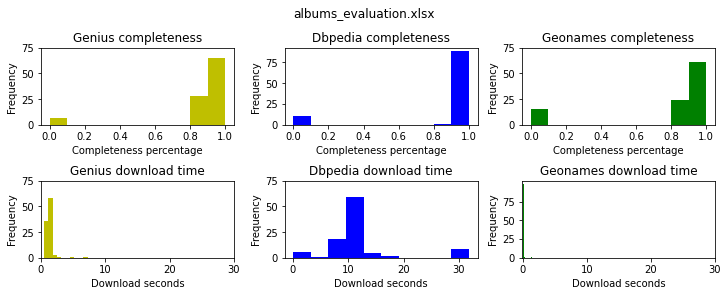

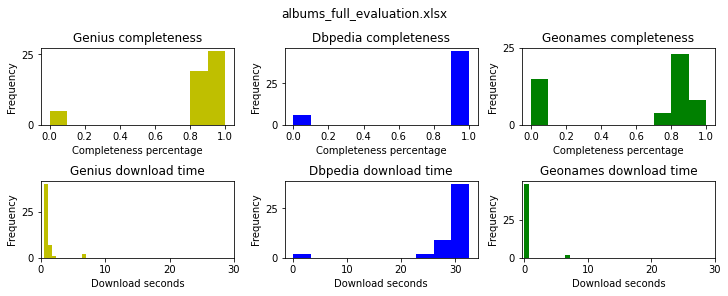

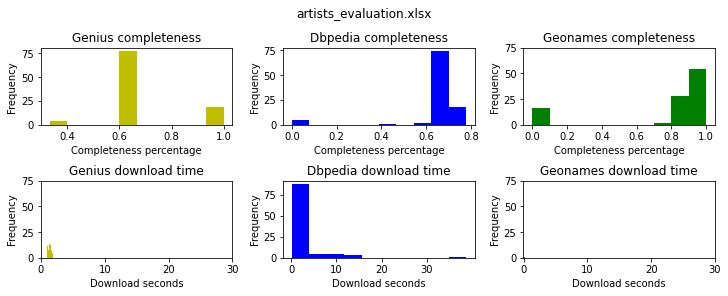

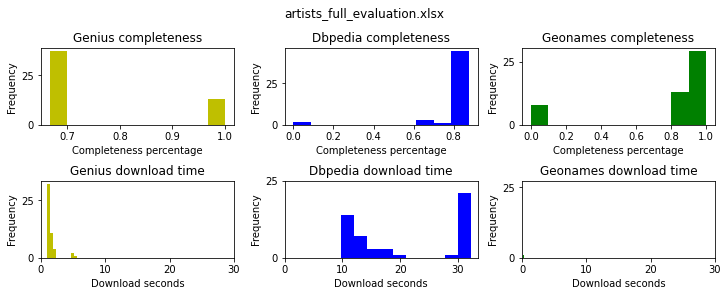

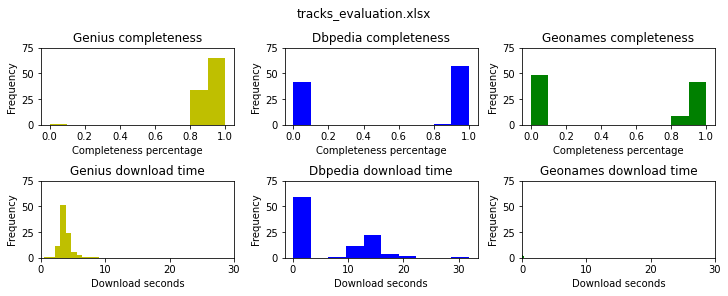

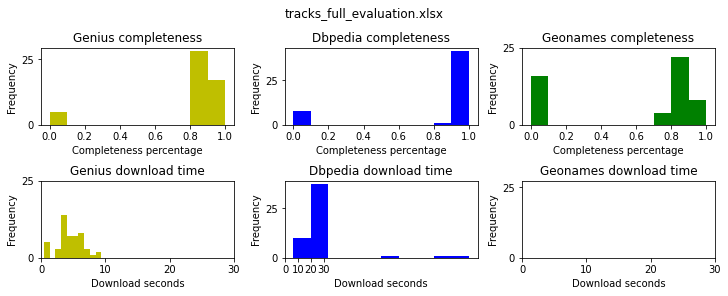

In [44]:
for filename, dataframe in dataframes.items():
    genius_completeness = dataframe['genius_completeness']
    dbpedia_completeness = dataframe['dbpedia_completeness']
    geonames_completeness = dataframe['geonames_completeness']

    genius_download_time = dataframe['genius_download_time']
    dbpedia_download_time = dataframe['dbpedia_download_time']
    geonames_download_time = dataframe['geonames_download_time']

    # Plotting
    series_to_plot = [
                  genius_completeness, dbpedia_completeness, geonames_completeness,
                  genius_download_time, dbpedia_download_time, geonames_download_time
    ]
    plot_series(filename, series_to_plot)